<a href="https://colab.research.google.com/github/lavanyasrivastava/BrainSpyy/blob/main/240594_LavanyaSrivastava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Pre-processing image

In [4]:
import cv2              #for loading and pre-processing the image
import numpy as np      #for implementing convolution kernel
from PIL import Image
import matplotlib.pyplot as plt

In [45]:
image_path = '/content/drive/MyDrive/monarch-butterfly-on-a-black-eyed-susan-in-the-royalty-free-image-1724176685.jpg.jpg'
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
gray_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)     # converting image to greyscale

In [46]:
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))

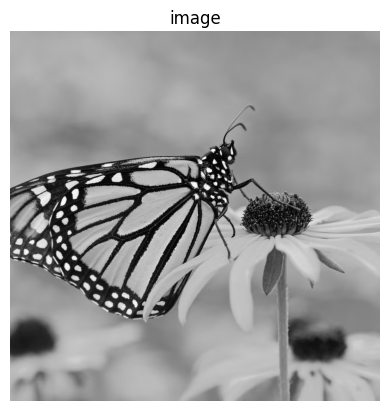

In [47]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('image')
plt.show()

In [48]:
def simple_conv(gray_image, kernel):

    pad_size = kernel.shape[0] // 2
    image_padded = np.pad(gray_image, pad_size, mode='edge')

    output = np.zeros_like(gray_image)

    for x in range(gray_image.shape[1]):
        for y in range(gray_image.shape[0]):
            patch = image_padded[y:y+kernel.shape[0], x:x+kernel.shape[1]]
            output[y, x] = np.sum(patch * kernel)
    return output

# Sobel Kernel

In [52]:
Sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

In [53]:
edges_x = simple_conv(gray_image, Sobel_x)
edges_y = simple_conv(gray_image, Sobel_y)
edges = np.sqrt(edges_x**2 + edges_y**2)

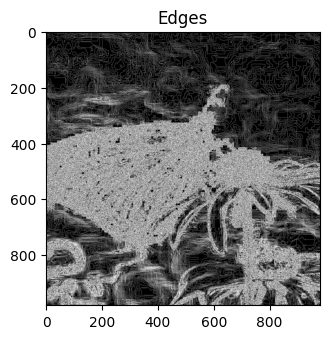

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(133); plt.imshow(edges, cmap='gray'); plt.title('Edges')
plt.show()

# Scharr

In [56]:
Scharr_x = np.array([[3, 0, -3],
                     [10, 0, -10],
                     [3, 0, -3]])
Scharr_y = np.array([[3, 10, 3],
                     [0, 0, 0],
                     [-3, -10, -3]])

In [57]:
edges_x = simple_conv(gray_image, Scharr_x)
edges_y = simple_conv(gray_image, Scharr_y)
edges = np.sqrt(edges_x**2 + edges_y**2)

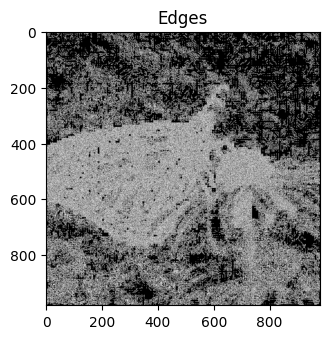

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(133); plt.imshow(edges, cmap='gray'); plt.title('Edges')
plt.show()

# Prewitt

In [59]:
Prewitt_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
Prewitt_y = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

In [60]:
edges_x = simple_conv(gray_image, Prewitt_x)
edges_y = simple_conv(gray_image, Prewitt_y)
edges = np.sqrt(edges_x**2 + edges_y**2)

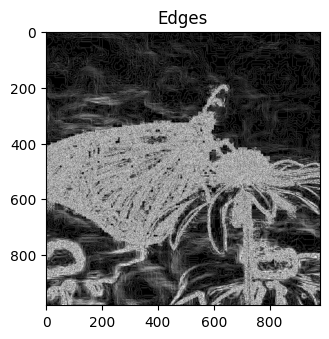

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(133); plt.imshow(edges, cmap='gray'); plt.title('Edges')
plt.show()